##### source: https://thecleverprogrammer.com/2020/11/30/amazon-bestselling-books-analysis-with-python/

### Required packages

In [1]:
# for data manipulation
import pandas as pd

# for simple linear algebra
import numpy as np

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# for text manipulation
import string
import re

# load dataset
df = pd.read_csv('/Users/szuminchao/Desktop/IE/self/projects/amazon_bestselling_books/bestsellers with categories.csv')

### Data preparation

In [2]:
df.rename(columns={'User Rating':'user_rating'}, inplace=True)
df

,Name,Author,user_rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


In [3]:
df[df['Author'] == 'J. K. Rowling']
df[df['Author'] == 'J.K. Rowling']
df.loc[df['Author'] == 'J. K. Rowling', 'Author'] = 'J.K. Rowling' # conditional that returns a boolean series with column 'Author'
df['name_len'] = df['Name'].apply(lambda x: len(x)-x.count(' ')) # create a column 'name_len' that it counts the length of name without space

punctuations = string.punctuation
print('list of punctuation:', punctuations) # list of punctuation: !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
def count_punc(text):
    count = sum(1 for char in text if char in punctuations)
    return count

df['punc_count'] = df['Name'].apply(lambda x: count_punc(x))
df

list of punctuation: !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


,Name,Author,user_rating,Reviews,Price,Year,Genre,name_len,punc_count
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction,26,1
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction,15,3
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction,32,1
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction,20,2
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction,59,6
...,...,...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction,36,2
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction,71,1
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction,71,1
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction,71,1


/var/folders/30/t66d82654bs8dvfykph6fz300000gn/T/ipykernel_47868/4109872452.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


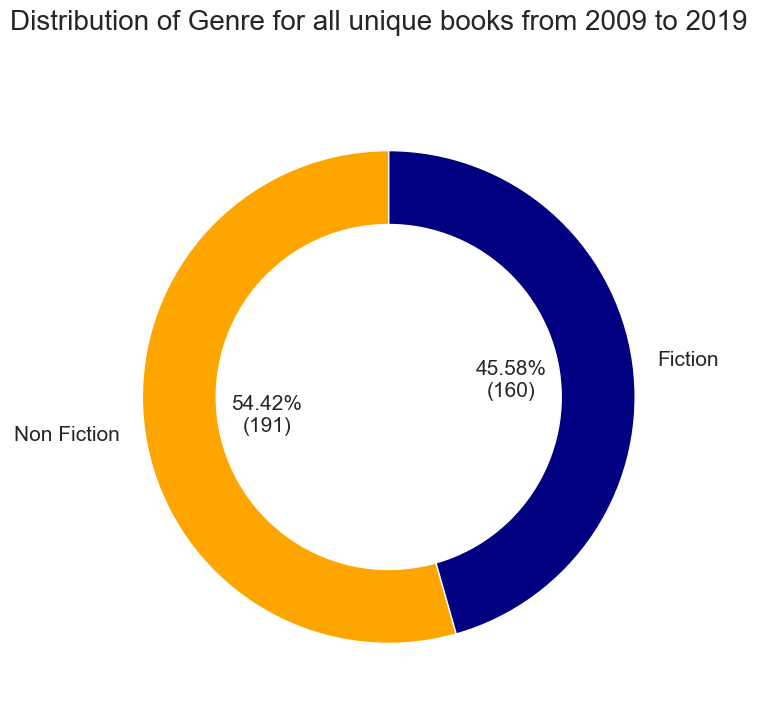

In [4]:
no_dup = df.drop_duplicates('Name')
g_count = no_dup['Genre'].value_counts() # 191, 160 indicates the unique counts for 'non-fiction' & fiction'

fig, ax = plt.subplots(figsize=(8, 8)) # fig is the canva, ax is the pie chart

def make_autopct(values):
    def my_autopct(pct): # my_autopct returns the percentages & actual values on the piechart 
        total = sum(values)
        val = int(round(pct*total/100))
        return '{p:.2f}%\n({v:d})'.format(p=pct, v=val) # p:.2f -> p shows in 2-digit floating values, v:d -> v comes out with decimal integer
    return my_autopct

genre_col = ['orange','navy']

center_circle = plt.Circle((0, 0), 0.7, color='white') # plt.Circle((x-axis, y-axis), radius)
plt.pie(x=g_count.values, labels=g_count.index, autopct=make_autopct(g_count.values), startangle=90, textprops={'size':15}, pctdistance=0.5, colors=genre_col)
ax.add_artist(center_circle)

fig.suptitle('Distribution of Genre for all unique books from 2009 to 2019', fontsize=20)
fig.show()

In [5]:
no_dup

,Name,Author,user_rating,Reviews,Price,Year,Genre,name_len,punc_count
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction,26,1
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction,15,3
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction,32,1
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction,20,2
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction,59,6
...,...,...,...,...,...,...,...,...,...
538,Winter of the World: Book Two of the Century T...,Ken Follett,4.5,10760,15,2012,Fiction,43,1
539,Women Food and God: An Unexpected Path to Almo...,Geneen Roth,4.2,1302,11,2010,Non Fiction,50,1
540,Wonder,R. J. Palacio,4.8,21625,9,2013,Fiction,6,0
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction,36,2


In [6]:
g_count # the g_counts above is 191 & 160 due to removing duplicating names of books

Genre
Non Fiction    191
Fiction        160
Name: count, dtype: int64

### Percentage of non-fiction & fiction by each year

/var/folders/30/t66d82654bs8dvfykph6fz300000gn/T/ipykernel_47868/3983716310.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


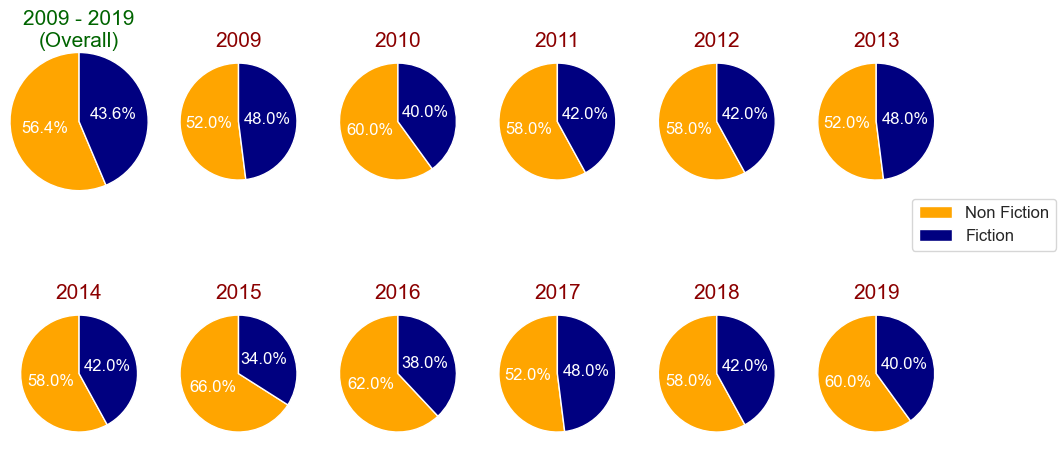

In [7]:
y1 = np.arange(2009, 2014)
y2 = np.arange(2014, 2020)
g_count = df['Genre'].value_counts() # now g_count is 310 & 240 bcz we do not remove the duplicated ones

fig, ax = plt.subplots(2, 6, figsize=(12, 6))

ax[0,0].pie(x=g_count.values, labels=None, autopct='%1.1f%%', startangle=90, textprops={'size':12, 'color':'white'}, pctdistance=0.5, radius=1.3, colors=genre_col)
ax[0,0].set_title('2009 - 2019\n(Overall)', color='darkgreen', fontdict={'fontsize': 15})

for i, year in enumerate(y1): # [(0, 2009), (1, 2010), (2, 2011), ..., (5, 2013)]
    counts = df[df['Year'] == year]['Genre'].value_counts()
    ax[0,i+1].pie(x=counts.values, labels=None, autopct='%1.1f%%', startangle=90, textprops={'size': 12,'color': 'white'}, pctdistance=0.5, colors=genre_col, radius=1.1)
    ax[0,i+1].set_title(year, color='darkred', fontdict={'fontsize':15})

for i, year in enumerate(y2):
    counts = df[df['Year'] == year]['Genre'].value_counts()
    ax[1,i].pie(x=counts.values, labels=None, autopct='%1.1f%%', startangle=90, textprops={'size': 12,'color': 'white'}, pctdistance=0.5, colors=genre_col, radius=1.1)
    ax[1,i].set_title(year, color='darkred', fontdict={'fontsize':15})

fig.legend(g_count.index, loc='center right', fontsize=12)
fig.show()

### Top 10 authors for both non-fiction & fiction based on their appearances

In [8]:
best_nf_authors = df.groupby(['Author', 'Genre']).agg({'Name':'count'}).unstack()['Name', 'Non Fiction'].sort_values(ascending=False)[:11]
best_f_authors = df.groupby(['Author', 'Genre']).agg({'Name':'count'}).unstack()['Name', 'Fiction'].sort_values(ascending=False)[:11]

/var/folders/30/t66d82654bs8dvfykph6fz300000gn/T/ipykernel_47868/969175339.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels(best_nf_authors.index, fontsize=12, fontweight='semibold')
/var/folders/30/t66d82654bs8dvfykph6fz300000gn/T/ipykernel_47868/969175339.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_yticklabels(best_f_authors.index, fontsize=12, fontweight='semibold')
/var/folders/30/t66d82654bs8dvfykph6fz300000gn/T/ipykernel_47868/969175339.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


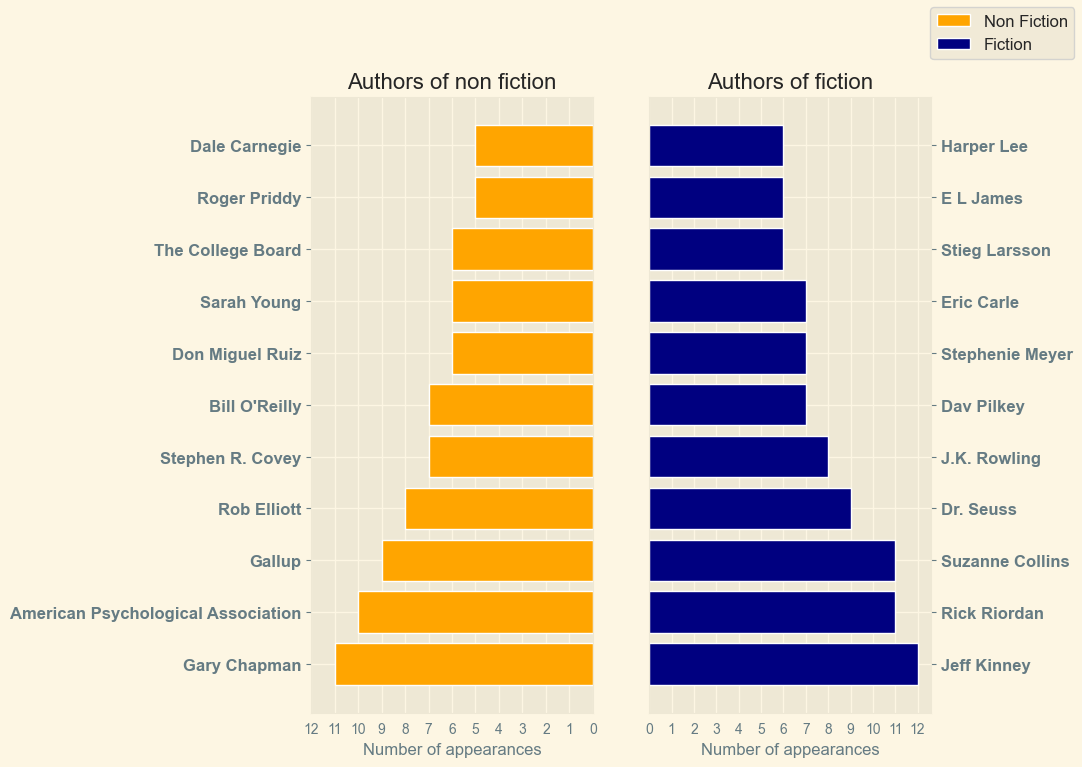

In [9]:
with plt.style.context('Solarize_Light2'):
    fig, ax = plt.subplots(1, 2, figsize=(8, 8))

    ax[0].barh(y=best_nf_authors.index, width=best_nf_authors.values, color=genre_col[0])
    ax[0].invert_xaxis()
    ax[0].yaxis.tick_left()
    ax[0].set_xticks(np.arange(max(best_f_authors.values)+1))
    ax[0].set_yticklabels(best_nf_authors.index, fontsize=12, fontweight='semibold')
    ax[0].set_xlabel('Number of appearances')
    ax[0].set_title('Authors of non fiction')

    ax[1].barh(y=best_f_authors.index, width=best_f_authors.values, color=genre_col[1])
    ax[1].yaxis.tick_right()
    ax[1].set_xticks(np.arange(max(best_f_authors.values)+1))
    ax[1].set_yticklabels(best_f_authors.index, fontsize=12, fontweight='semibold')
    ax[1].set_xlabel('Number of appearances')
    ax[1].set_title('Authors of fiction')

    fig.legend(['Non Fiction', 'Fiction'], fontsize=12)
fig.show()

### Top 20 authors in all genres where the duplicate book names are excluded

/var/folders/30/t66d82654bs8dvfykph6fz300000gn/T/ipykernel_47868/1668191153.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels(top_authors.index, fontweight='semibold')


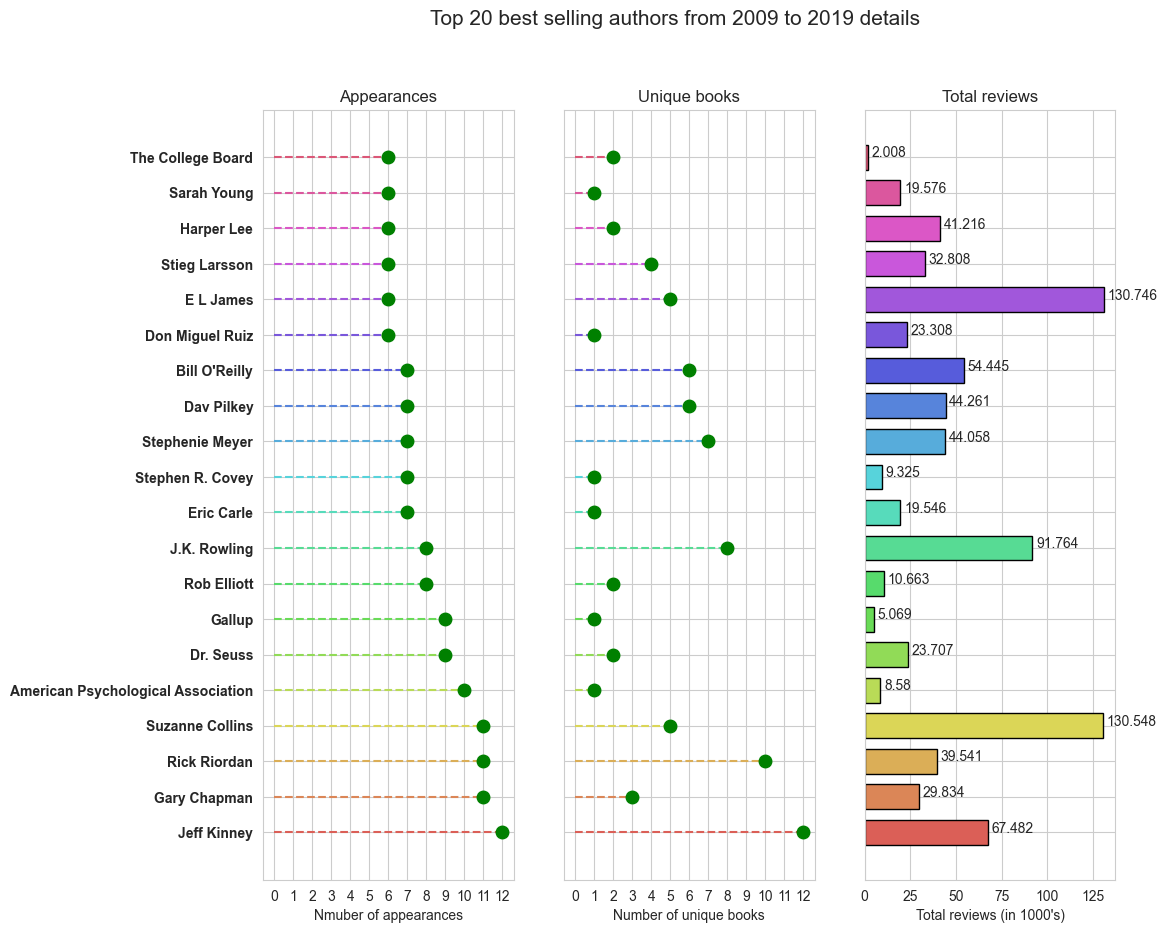

In [10]:
n_best = 20

top_authors = df.Author.value_counts().nlargest(n_best) # nlargest returns a specified number of rows
no_dup = df.drop_duplicates('Name') # drop the rows where the book names are duplicate

fig, ax = plt.subplots(1, 3, figsize=(11, 10), sharey=True)

color = sns.color_palette('hls', n_best)

ax[0].hlines(y=top_authors.index, xmin=0, xmax=top_authors.values, color=color, linestyles='dashed')
ax[0].plot(top_authors.values, top_authors.index, 'go', markersize=9)
ax[0].set_xlabel('Nmuber of appearances')
ax[0].set_xticks(np.arange(top_authors.values.max()+1))
ax[0].set_yticklabels(top_authors.index, fontweight='semibold')
ax[0].set_title('Appearances')

book_count = []
total_reviews = []

for name, col in zip(top_authors.index, color):
    book_count.append(len(no_dup[no_dup['Author'] == name]['Name']))
    total_reviews.append(no_dup[no_dup['Author'] == name]['Reviews'].sum()/1000)

ax[1].hlines(y=top_authors.index, xmin=0, xmax=book_count, color=color, linestyle='dashed')
ax[1].plot(book_count, top_authors.index, 'go', markersize=9)
ax[1].set_xlabel('Number of unique books')
ax[1].set_xticks(np.arange(max(book_count)+1))
ax[1].set_title('Unique books')

ax[2].barh(y=top_authors.index, width=total_reviews, color=color, edgecolor='black', height=0.7)
for name, val in zip(top_authors.index, total_reviews):
    ax[2].text(val+2, name, val)
ax[2].set_xlabel("Total reviews (in 1000's)")
ax[2].set_title('Total reviews')

plt.suptitle('Top 20 best selling authors from 2009 to 2019 details', fontsize=15)
plt.show()

In [11]:
no_dup

,Name,Author,user_rating,Reviews,Price,Year,Genre,name_len,punc_count
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction,26,1
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction,15,3
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction,32,1
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction,20,2
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction,59,6
...,...,...,...,...,...,...,...,...,...
538,Winter of the World: Book Two of the Century T...,Ken Follett,4.5,10760,15,2012,Fiction,43,1
539,Women Food and God: An Unexpected Path to Almo...,Geneen Roth,4.2,1302,11,2010,Non Fiction,50,1
540,Wonder,R. J. Palacio,4.8,21625,9,2013,Fiction,6,0
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction,36,2
